# Media's Tweets Sentiment Analysis (BBC,CBS,CNN,Fox,New Yark Times) 
### Tools -Pandas,Matplotlib,Tweepy and vaderSentiment
(Author:Thanu Thavasi Perumal)

<b>Objective:</b><br>I am creating a Python script to perform a sentiment analysis of the Twitter activities of various news outlets, and presenting my findings visually.

My final output would provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: BBC, CBS, CNN, Fox, and New York times.

In [1]:
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


# Importing and Initializing Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
target_terms=['BBC','CBS','CNN','Fox','New York Times']

In [3]:
# Variable for holding sentiments
sentiments = []

# Variable for max_id
oldest_tweet = None

# Looping through each target term to collect their tweets 
for term in target_terms: 
    
    counter = 1 #Counter counts for number of tweets
    public_tweets = api.search(term,count=100,max_id = oldest_tweet)#API search to collect the tweets

    # Loop through all tweets 
    for tweet in public_tweets['statuses']:

        print(f"Tweet {counter}: {tweet['text']}")
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        
        #Collecting the sentiment polarities
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        
        # Assigning tweet['id'] - 1 to oldest_tweet so as to avoid any duplicate tweets
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiment analysis results for each tweet into a list
        sentiments.append({"Name":term,
                            "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Incrementing the counter
        counter += 1

Tweet 1: RT @mjpt777: People have been manipulated.
https://t.co/iotMcHbDDm
Tweet 2: https://t.co/KJsE4oRkTh
Tweet 3: Now playing@ https://t.co/Q9WNF2eAuR  Beatles - "I Feel Fine (BBC)" 1960s pop rock soul
Tweet 4: RT @iAsadM: That's the power of Imran Khan... International Media showing him live with English translation (audio)
#BBC #CNN #AlJazeera 
#…
Tweet 5: The moment a migrant mother is reunited with her son https://t.co/gegAJOeRD9
Tweet 6: The fall in Facebook's shares wiped more than $120bn off the company's market value on Thursday. #facebook https://t.co/g1Q3p6Wrdx
Tweet 7: @bbclaurak @BBCNewsnight Well, never mind the people who will suffer from brexit.  You and the BBC have lost your u… https://t.co/YrIwE8sTxP
Tweet 8: RT @Deal_Town: #GoodwinSands dredging plans 'disgusting' : David Brocklehurst, chairman of the Battle of Britain Museum, said it was a "tra…
Tweet 9: New Jersey radio DJs off air for turban jibe at prosecutor - BBC News https://t.co/4yJrtac6hC  This is how Sh

Tweet 1: @CJLeBlanc @DALS_TF1 @FredericPedraza @fromlosangeles @FanFDAFrance @YRInsider @YandR_CBS @ginatognoni… https://t.co/Y4AZuyeu3t
Tweet 2: RT @EliotShorrParks: Top 3 CBs in are Mills, Darby and Sidney Jones (nickel) #Eagles
Tweet 3: RT @to146toru: #반국가반사회반종교 #cbs_허위왜곡보도 #한기총거짓말 #신사참배우상숭배

누구보고 반국가 반사회 반종교?

적폐 청산 1순위는...

한기총과 CBS인데

 https://t.co/BoEzSnk6uI https://t.c…
Tweet 4: Anyone else watching Strange Angel on CBS? It's the story of Jack Parsons, America's first rocket scientist &amp; most… https://t.co/i7xOrGHlrc
Tweet 5: @BandB_CBS  https://t.co/6yVHItL2j4
Tweet 6: @Hood318Lahood @Rhonda43969020 @niccid28 @BandB_CBS Lol! He is! This mess may just push him off the edge.
Tweet 7: RT @DEADLINE: .@KelseyGrammer is fielding interest to put together a new #Frasier series https://t.co/RIInW7sVNo
Tweet 8: How Kavanaugh could shape the coming "watershed" moment for digital privacy - CBS News https://t.co/Ocf1bQgegg by
Tweet 9: RT @cbsallaccess: It's a wedding to remember today o

Tweet 1: RT @CNN: The Trump administration wants to roll back the Endangered Species Act. These 10 animals might not be here today without it. https…
Tweet 2: RT @ndrew_lawrence: Fox News executives on the White House banning CNN: "Fox stands firmly with CNN on this issue of access"

Fox's Lou Dob…
Tweet 3: RT @renato_mariotti: CNN hired an independent audio forensics expert to analyze the Trump-Cohen tape. He concluded that Trump told Cohen, "…
Tweet 4: RT @RyanAFournier: Sadly, the greatest threat to our country is not Russia, China or North Korea. It's MSNC, CNN, ABC, NBC, WaPo and the NY…
Tweet 5: RT @GovMikeHuckabee: Breaking wind from CNN!  Mark Zuckerberg announces Facebook will change name to FAKEBOOK to more accurately reflect ho…
Tweet 6: RT @Candeliano: Que para ver un titular claro, conciso y ajustado a la realidad, tengas que conectar la CNN de Chile, dice mucho del nivel…
Tweet 7: RT @TheLeadCNN: A top Trump Organization official and the company's longtime chief financial

Tweet 1: RT @RealJamesWoods: “When we have something that we think — that a fact checker has told is probably not true, or a lot of our audience is…
Tweet 2: RT @RealJamesWoods: Facebook executives admitting they stifle distribution of information their “fact checkers” and/or “numbers of follower…
Tweet 3: RT @Predator: Want to know more about the new film #ThePredator? Find out from the man himself. The director, Shane Black, sat down with th…
Tweet 4: RT @RafiDAngelo: I swear to god Tamera Mowry acts like she's the only Black woman who ever married white. Girl, don't nobody care that he's…
Tweet 5: @kwilli1046 Fox.
Tweet 6: RT @TheAdvocateMag: We beg to differ. https://t.co/Lrd2eY4Taf
Tweet 7: RT @GusTheTerror: When Trump loses FOX News he is DONE: Fox News' Judge Napolitano: Trump-Cohen Tapes Indicate Fraud, Not Protected By Atto…
Tweet 8: @fox_of_moon @GarbMaranhao É kk
Tweet 9: RT @ellievan65: DHS Secretary Nielsen on Fox News on the administration's plan to reunite immigrant chil

Tweet 1: RT @JudgeJeanine: Waking up to the news that #LiarsLeakersLiberals is a #1 New York Times Bestseller is the best way to wake up✨ https://t.…
Tweet 2: RT @bleedingedgedoc: The New York Times chose The Bleeding Edge as a NYT Critic's Pick! 
"The Bleeding Edge” isn’t an anti-medical film, bu…
Tweet 3: RT @ILoveBWEnsemble: The Ensemble will perform live from Broadway, Times Square New York from 22nd to 23rd August 2018. #BotswanaOnBroadway…
Tweet 4: RT @DVSblast: some guy tweet "soup is a salad" &amp; then 9000 people RT it like "CAN U BELIEVE THIS GUY? NO ITS NOT" &amp; then the New York Times…
Tweet 5: RT @itsJeffTiedrich: @nytimes oh good, finally a Times article about Trump supporters. Thank god someone is finally giving them a voice. af…
Tweet 6: RT @paulsonpics: — The New York Times (2016). https://t.co/phcF6mKGc2
Tweet 7: RT @jeffpsd: Bemidji Photographer Snaps Photo Of Mama Duck With 76 Babies https://t.co/iJtwBFfUA0
Tweet 8: RT @AmaniAAJ: افا ياذا العلم!! 😂💔
قطر بتصريح ضم

In [4]:
#Converting sentiment list into Dataframe
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd =sentiments_pd.set_index('Name')

#Exporting the dataframe into csv 
sentiments_pd.to_csv("Newsmood.csv") 
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
Name,,,,,,
BBC,-0.3818,Thu Jul 26 22:09:02 +0000 2018,0.698,0.302,0.000,1
BBC,0.0000,Thu Jul 26 22:09:02 +0000 2018,1.000,0.000,0.000,2
BBC,0.2023,Thu Jul 26 22:09:00 +0000 2018,0.859,0.000,0.141,3
BBC,0.0000,Thu Jul 26 22:09:00 +0000 2018,1.000,0.000,0.000,4
BBC,0.0000,Thu Jul 26 22:09:00 +0000 2018,1.000,0.000,0.000,5


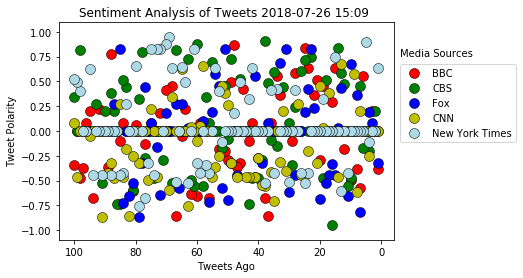

In [5]:
#Visuliztion of the reults:
#Plotting the results of 'BBC'
fig,ax=plt.subplots()

x_vals = sentiments_pd.loc['BBC']["Tweets Ago"]
y_vals = sentiments_pd.loc['BBC']["Compound"]
ax.scatter(x_vals,
         y_vals, marker="o",s=100, linewidth=0.5,
         alpha=1,c='r',edgecolors='black',label='BBC')

#Plotting the results of 'CBS'
x_vals = sentiments_pd.loc['CBS']["Tweets Ago"]
y_vals = sentiments_pd.loc['CBS']["Compound"]
ax.scatter(x_vals,
         y_vals, marker="o",s=100, linewidth=0.5,
         alpha=1,c='g',edgecolors='black',label='CBS')

#Plotting the results of 'FOX'
x_vals = sentiments_pd.loc['Fox']["Tweets Ago"]
y_vals = sentiments_pd.loc['Fox']["Compound"]
ax.scatter(x_vals,
         y_vals, marker="o",s=100, linewidth=0.5,
         alpha=1,c='b',edgecolors='black',label='Fox')

#Plotting the results of 'CNN'
x_vals = sentiments_pd.loc['CNN']["Tweets Ago"]
y_vals = sentiments_pd.loc['CNN']["Compound"]
ax.scatter(x_vals,
         y_vals, marker="o",s=100, linewidth=0.5,
         alpha=1,c='y',edgecolors='black',label='CNN')

#Plotting the results of 'New York Times'
x_vals = sentiments_pd.loc['New York Times']["Tweets Ago"]
y_vals = sentiments_pd.loc['New York Times']["Compound"]
ax.scatter(x_vals,
         y_vals, marker="o",s=100, linewidth=0.5,
         alpha=1,c='lightblue',edgecolors='black',label='New York Times')

#Graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets {now} ")
plt.legend(loc=(1.02,0.45))
plt.text(-6,0.75,'Media Sources')
plt.xlim(x_vals.max()+5,x_vals.min()-5) 
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("Sentiment Analysis of Tweets.png")
plt.show();

In [6]:
#Overall sentiment polarity analysis
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd1=sentiments_pd.reset_index()
sentiments_pd1=sentiments_pd1.groupby("Name").mean()

In [7]:
sentiments_pd1.reset_index(inplace=True)
sentiments_pd1

,Name,index,Compound,Negative,Neutral,Positive,Tweets Ago
0,BBC,49.5,-0.008777,0.867630,0.067210,0.065250,50.5
1,CBS,149.5,0.059889,0.869470,0.050440,0.080080,50.5
2,CNN,249.5,-0.100330,0.890670,0.070780,0.038520,50.5
3,Fox,343.5,-0.033915,0.868909,0.065102,0.066023,44.5
4,New York Times,437.5,0.053784,0.888500,0.045940,0.065570,50.5


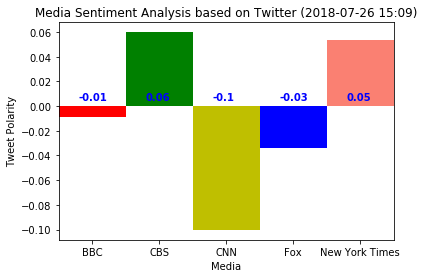

In [8]:
#Visualization of overall sentiment Analysis
fig,ax=plt.subplots()
ax.bar(sentiments_pd1['Name'],sentiments_pd1['Compound'],color=['r','g','y','b','salmon'],align='center',width=1)

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Media Sentiment Analysis based on Twitter ({now})")
plt.ylabel("Tweet Polarity")
plt.xlabel("Media");
plt.xlim(-0.5,4.5)
y=[0.005,0.005,0.005,0.005,0.005]
for i,j in enumerate(y): #Script to add the values on each bar.
    ax.text(i-0.2,j,round(sentiments_pd1['Compound'][i],2) , color='blue', fontweight='bold')
plt.savefig("Media Sentiment Analysis based on Twitter.png")
plt.show()

# Insights :
By analysing most recent 100 tweets of these Medias using Veder sentiment analysis package, its inferred that,at this point of time,

<ul><li> <b>CNN</b> has scored most negative rank based on people's reviews and tweets,and <b>Fox</b> has the second most negartive rank.</li>
<li> <b>CBS</b> scored most positive sentiment rank and <b>New York Time</b> has the second posivite score, proves that pople have positive ideas in their mind about CBS and BBC.</li>
 <li><b>BBC</b> has scored a very low negative ranking but almost near neutral score shows tweets are all of equal impact about this media's activities.</li></ul>
